# Tweet Disaster Analysis

We are trying to predict where a tweet is related to a disaster or not. It will be a full binary, YES or NO. We have location, keword and tweet text. Keyword and Location can be empty. 

In [1]:
import pandas as pd

import ktrain
from ktrain import text as txt

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
sample = pd.read_csv("sample_submission.csv")
train=train.head(150,)

#### EDA Let's take alook at the data. 

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        150 non-null    int64 
 1   keyword   119 non-null    object
 2   location  94 non-null     object
 3   text      150 non-null    object
 4   target    150 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 6.0+ KB


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [7]:
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [8]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


We will build two models, one just on the text and one on keyword location and text. For that we will merge the keyword and location into text by simple concatenation. 

In [9]:
train["keyword"] = train["keyword"].astype(str)
train["location"] = train["location"].astype(str)
train["merged"] = train["keyword"] + train["location"] + train["text"]
train.head()

,id,keyword,location,text,target,merged
0,1,nan,nan,Our Deeds are the Reason of this #earthquake M...,1,nannanOur Deeds are the Reason of this #earthq...
1,4,nan,nan,Forest fire near La Ronge Sask. Canada,1,nannanForest fire near La Ronge Sask. Canada
2,5,nan,nan,All residents asked to 'shelter in place' are ...,1,nannanAll residents asked to 'shelter in place...
3,6,nan,nan,"13,000 people receive #wildfires evacuation or...",1,"nannan13,000 people receive #wildfires evacuat..."
4,7,nan,nan,Just got sent this photo from Ruby #Alaska as ...,1,nannanJust got sent this photo from Ruby #Alas...


<AxesSubplot:>

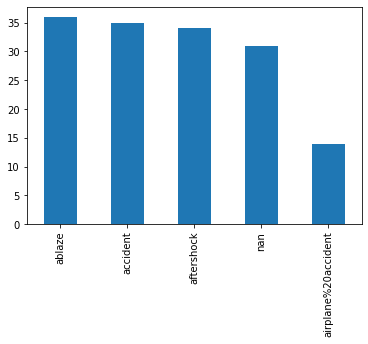

In [10]:
train.keyword.value_counts().plot(kind="bar")

### TRAINING

In the module Supervised Text Learning I learned about ktrain. Some of this code is heavily inspired by my project from that class, but parameters and more are adjusted for this problem here. 

In [11]:
t = txt.Transformer('distilbert-base-uncased', maxlen=200)

In [12]:
train1, val1, preprocess1 = txt.texts_from_df(train, "text", label_columns=["target"], val_df=None, max_features=10000, maxlen=100, val_pct=0.1, ngram_range=1, preprocess_mode='distilbert', verbose=1)

['not_target', 'target']
     not_target  target
58          1.0     0.0
13          0.0     1.0
1           0.0     1.0
107         1.0     0.0
131         1.0     0.0
['not_target', 'target']
     not_target  target
68          0.0     1.0
148         0.0     1.0
49          1.0     0.0
67          1.0     0.0
111         1.0     0.0
preprocessing train...
language: en
train sequence lengths:
	mean : 13
	95percentile : 24
	99percentile : 27


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 27


In [13]:
model = preprocess1.get_classifier()
learner = ktrain.get_learner(model, train_data=train1, val_data=val1, batch_size=16)

In [14]:
history=learner.autofit(1e-4,checkpoint_folder='checkpoint',epochs=12, early_stopping=True)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/12
9/9 [==============================] - 20s 2s/step - loss: 0.6676 - accuracy: 0.5481 - val_loss: 0.7542 - val_accuracy: 0.4667
Epoch 2/12
9/9 [==============================] - 14s 2s/step - loss: 0.4724 - accuracy: 0.7926 - val_loss: 0.4639 - val_accuracy: 0.8000
Epoch 3/12
9/9 [==============================] - 13s 1s/step - loss: 0.2031 - accuracy: 0.9556 - val_loss: 0.2759 - val_accuracy: 0.9333
Epoch 4/12
9/9 [==============================] - 14s 2s/step - loss: 0.1303 - accuracy: 0.9556 - val_loss: 0.3135 - val_accuracy: 0.8667
Epoch 00004: early stopping
Weights from best epoch have been loaded into model.


In [15]:
train2, val2, preprocess2 = txt.texts_from_df(train, "merged", label_columns=["target"], val_df=None, max_features=10000, maxlen=200, val_pct=0.1, ngram_range=1, preprocess_mode='distilbert', verbose=1)

['not_target', 'target']
     not_target  target
4           0.0     1.0
92          0.0     1.0
68          0.0     1.0
100         0.0     1.0
1           0.0     1.0
['not_target', 'target']
     not_target  target
113         1.0     0.0
128         1.0     0.0
75          1.0     0.0
70          1.0     0.0
146         0.0     1.0
preprocessing train...
language: en
train sequence lengths:
	mean : 14
	95percentile : 26
	99percentile : 27


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 15
	95percentile : 24
	99percentile : 26


In [16]:
model2 = preprocess2.get_classifier()
learner2 = ktrain.get_learner(model2, train_data=train2, val_data=val2, batch_size=16)
history2=learner2.autofit(1e-4,checkpoint_folder='checkpoint',epochs=12, early_stopping=True)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/12
9/9 [==============================] - 32s 3s/step - loss: 0.6639 - accuracy: 0.6296 - val_loss: 0.5651 - val_accuracy: 0.9333
Epoch 2/12
9/9 [==============================] - 27s 3s/step - loss: 0.4300 - accuracy: 0.9111 - val_loss: 0.3255 - val_accuracy: 0.8667
Epoch 3/12
9/9 [==============================] - 28s 3s/step - loss: 0.1485 - accuracy: 0.9704 - val_loss: 0.2870 - val_accuracy: 0.8667
Epoch 4/12
9/9 [==============================] - 28s 3s/step - loss: 0.0687 - accuracy: 0.9852 - val_loss: 0.4820 - val_accuracy: 0.8000
Epoch 00004: early stopping
Weights from best epoch have been loaded into model.


In [17]:
learner.save_model("/distilbertmodel_learner1")
learner2.save_model("/distilbertmodel_learner2")

Let;s look into the stats a little more

In [18]:
acc1 = learner.validate()[1]
acc2 = learner2.validate()[1]

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.90      1.00      0.95         9

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.86      0.90      0.86        15
weighted avg       0.90      0.87      0.87        15



We can see our first model performs quite interestingly. The first model performs better than the first second one if it is false, but both do, however the fist model is a lot better in the true.  
The first model performs better overall, so I would be continuing with it. 

### Submission

In [19]:
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [25]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [48]:
text_data = test['text'].tolist()

test_data = preprocess2.preprocess_test(text_data)

predictions = learner2.predict(test_data)

preprocessing test...
language: en
test sequence lengths:
	mean : 15
	95percentile : 25
	99percentile : 27


In [56]:
sample["target"] = predictions

In [57]:
sample

,id,target
0,0,0.064996
1,2,0.877672
2,3,0.072352
3,9,0.042393
4,11,0.115514
...,...,...
3258,10861,0.097199
3259,10865,0.059677
3260,10868,0.045405
3261,10874,0.075686


In [60]:
sample["target"] = sample["target"].round().astype(int)

In [61]:
sample

,id,target
0,0,0
1,2,1
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [65]:
sample.to_csv('result.csv',index=False)

This is ready to submit